# Neural Network Practise using MINST Fashion dataset

In [1]:
%tensorflow_version 2.x 

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Dataset
Contains 60k images for training and 10k images for validating/testing.

It stores oixel data of clothing outfits

In [2]:
fashion_mist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]
# pixelvalues are between0 and 255, 0 being black and 255 being white

194

In [5]:
train_labels[:10]
# labels are integers ranging from 0 to 9. Each integer represents a specific article of clothing. An array of label names can be used to 
# to indicate which is what

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

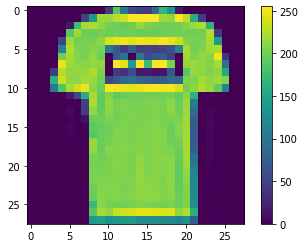

In [7]:
# image demonstrations
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Pre-Processing

In [8]:
# transforming data values to be in between 0 to 1

train_images = train_images/ 255

test_images = test_images / 255

## Building Model

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),   # input layer -1
    keras.layers.Dense(128, activation = 'relu'), # hidden layer-2
    keras.layers.Dense(10, activation = 'softmax') # output layer -3
])

Layer 1: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

Layer 3: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

In [10]:
# compiling of model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [11]:
# train the model
model.fit(train_images, train_labels, epochs= 10) # we pass the data, labels and epochs

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4990 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3775 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3388 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3157 - accuracy: 0.8832
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2941 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2821 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2703 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2586 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2491 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [12]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:' , test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3337 - accuracy: 0.8835
Test accuracy: 0.8834999799728394


In [17]:
# make predictions
predictions = model.predict(test_images)
#predictions1 = model.predict([test_images[0]])

In [14]:
predictions[0]

array([5.89145905e-08, 1.81528015e-09, 1.84126350e-08, 1.42076528e-08,
       8.65920242e-07, 1.41455997e-02, 5.28420628e-07, 1.12050455e-02,
       4.38395951e-08, 9.74647880e-01], dtype=float32)

In [24]:
#to retrieve highest value from Index
itemname= np.argmax(predictions[0])
itemname

9

In [20]:
class_name[np.argmax(predictions[0])]

'Ankle boot'

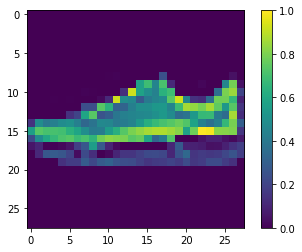

In [25]:
#Predictions Image visualization
plt.figure()
plt.imshow(test_images[itemname])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 3


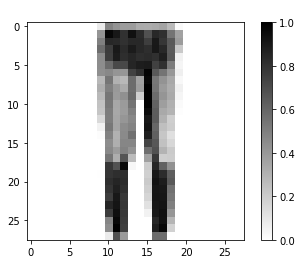

In [28]:
# program function to verify the predicted item by visual comparion
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)